Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Load Data

In [2]:
df=pd.read_csv("/content/AusApparalSales4thQrt2020.csv")
pd.set_option('display.max_columns',None)
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.isna().sum()

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [6]:
df.notna().all()

,0
Date,True
Time,True
State,True
Group,True
Unit,True
Sales,True


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe(include="all")

,Date,Time,State,Group,Unit,Sales
count,7560,7560,7560,7560,7560.000000,7560.000000
unique,NaN,3,7,4,NaN,NaN
top,NaN,Morning,WA,Kids,NaN,NaN
freq,NaN,2520,1080,1890,NaN,NaN
mean,2020-11-15 04:00:00.000000256,NaN,NaN,NaN,18.005423,45013.558201
min,2020-10-01 00:00:00,NaN,NaN,NaN,2.000000,5000.000000
25%,2020-10-23 00:00:00,NaN,NaN,NaN,8.000000,20000.000000
50%,2020-11-15 12:00:00,NaN,NaN,NaN,14.000000,35000.000000
75%,2020-12-08 00:00:00,NaN,NaN,NaN,26.000000,65000.000000
max,2020-12-30 00:00:00,NaN,NaN,NaN,65.000000,162500.000000


In [9]:
df[(df['Sales']<0) | (df['Unit']<0)]

,Date,Time,State,Group,Unit,Sales


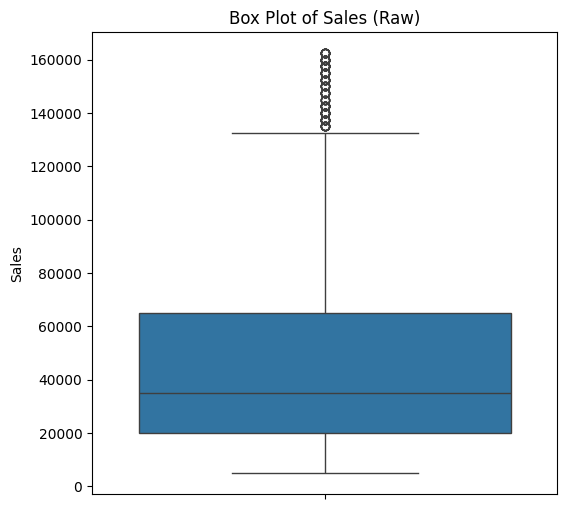

In [10]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['Sales'])
plt.title("Box Plot of Sales (Raw)")
plt.show()

In [11]:
Q1=df['Sales'].quantile(0.25)
Q3=df['Sales'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['Sales']>=lower_bound) & (df['Sales']<=upper_bound)]


In [12]:

scaler=MinMaxScaler()
df[['Sales_norm','Unit_norm']]=scaler.fit_transform(df[["Sales","Unit"]])
df.head()

,Date,Time,State,Group,Unit,Sales,Sales_norm,Unit_norm
0,2020-10-01,Morning,WA,Kids,8,20000,0.117647,0.117647
1,2020-10-01,Morning,WA,Men,8,20000,0.117647,0.117647
2,2020-10-01,Morning,WA,Women,4,10000,0.039216,0.039216
3,2020-10-01,Morning,WA,Seniors,15,37500,0.254902,0.254902
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.019608,0.019608


In [13]:
# Total sales by group
sales_by_group=df.groupby('Group')['Sales'].sum()
sales_by_group

,Sales
Group,
Kids,81367500
Men,81315000
Seniors,78647500
Women,80637500


In [14]:
# Total sales by state
sales_by_state=df.groupby('State')['Sales'].sum()
sales_by_state

,Sales
State,
NSW,74970000
NT,22580000
QLD,33417500
SA,58857500
TAS,22760000
VIC,87230000
WA,22152500


In [15]:
# Total sales by unit and group
state_group_sales=df.groupby(['State','Group'])['Sales'].sum().reset_index()
state_group_sales

,State,Group,Sales
0,NSW,Kids,18587500
1,NSW,Men,19022500
2,NSW,Seniors,18187500
3,NSW,Women,19172500
4,NT,Kids,5700000
5,NT,Men,5762500
6,NT,Seniors,5465000
7,NT,Women,5652500
8,QLD,Kids,8510000
9,QLD,Men,8392500


Data Analysis

In [16]:
sales_unit_statistic=pd.DataFrame({
    'statistic':['mean','median','mode','std'],
    'sales':[df['Sales'].mean(),df['Sales'].median(),df['Sales'].mode().iloc[0],df['Sales'].std()],
    'Unit':[df['Unit'].mean(),df['Unit'].median(),df['Unit'].mode().iloc[0],df['Unit'].iloc[0]]
})
display(sales_unit_statistic)

,statistic,sales,Unit
0,mean,43292.65833,17.317063
1,median,35000.00000,14.000000
2,mode,22500.00000,9.000000
3,std,29565.25541,8.000000


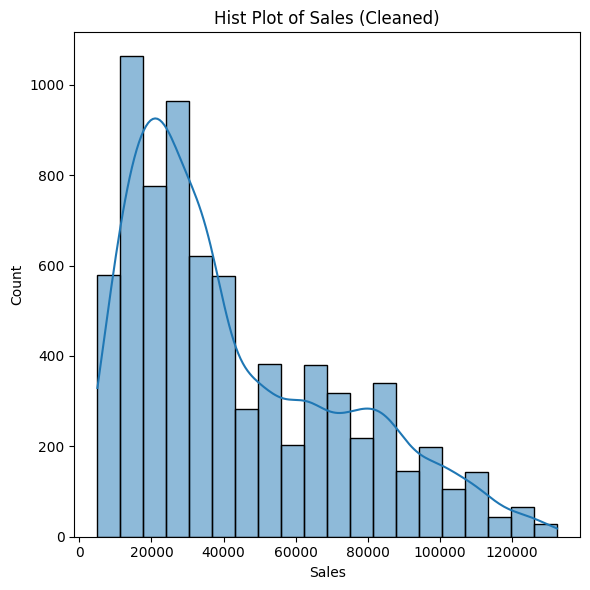

In [17]:
plt.figure(figsize=(6, 6))
sns.histplot(x=df['Sales'],kde=True,bins=20)
plt.title('Hist Plot of Sales (Cleaned)')
plt.tight_layout()
plt.show()


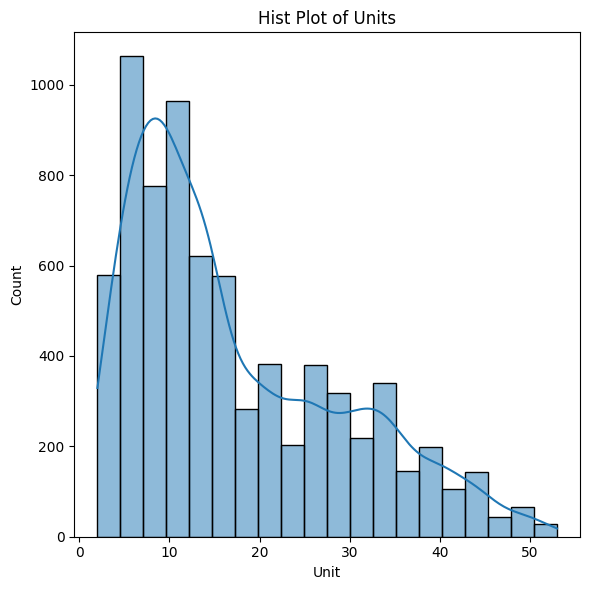

In [18]:
plt.figure(figsize=(6, 6))
sns.histplot(x=df['Unit'],kde=True,bins=20)
plt.title('Hist Plot of Units')
plt.tight_layout()
plt.show()

Which group has highest and lowest sales?

In [19]:
sales_by_group.sort_values(ascending=False)

,Sales
Group,
Kids,81367500
Men,81315000
Women,80637500
Seniors,78647500


In [20]:
best_group=sales_by_group.idxmax()
best_group_sales=sales_by_group.max()

worst_group=sales_by_group.idxmin()
worst_group_sales=sales_by_group.min()
print(f"The best group is {best_group} with  best group sales is {best_group_sales}. \n The worst group is {worst_group} with worst group sales is {worst_group_sales}")

The best group is  Kids with  best group sales is 81367500. 
 The worst group is  Seniors with worst group sales is 78647500


which state is generating the highest and lowest sales?

In [21]:
sales_by_state.sort_values(ascending=False)

,Sales
State,
VIC,87230000
NSW,74970000
SA,58857500
QLD,33417500
TAS,22760000
NT,22580000
WA,22152500


In [22]:
best_state=sales_by_state.idxmax()
best_state_sales=sales_by_state.max()

worst_state=sales_by_state.idxmin()
worst_state_sales=sales_by_state.min()

print(f"The best state is {best_state} with  best state sales is {best_state_sales}. \n The worst state is {worst_state} with worst state sales is {worst_state_sales}")

The best state is  VIC with  best state sales is 87230000. 
 The worst state is  WA with worst state sales is 22152500


Weekly, monthly, and quarterly reports

In [23]:
df=df.set_index('Date')

In [24]:
#weekly report
weekly_sales=df[['Sales','Unit']].resample('W').sum()
weekly_sales

,Sales,Unit
Date,,
2020-10-04,15045000,6018
2020-10-11,27002500,10801
2020-10-18,26640000,10656
2020-10-25,26815000,10726
2020-11-01,21807500,8723
2020-11-08,20865000,8346
2020-11-15,21172500,8469
2020-11-22,21112500,8445
2020-11-29,21477500,8591


In [25]:
# monthly report
monthly_sales=df[['Sales','Unit']].resample('M').sum()
monthly_sales

/tmp/ipython-input-703688708.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales=df[['Sales','Unit']].resample('M').sum()


,Sales,Unit
Date,,
2020-10-31,114290000,45716
2020-11-30,90682500,36273
2020-12-31,116995000,46798


In [26]:
# Quarterly report
quarterly_sales=df[['Sales','Unit']].resample('Q').sum()
quarterly_sales

/tmp/ipython-input-3726459656.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales=df[['Sales','Unit']].resample('Q').sum()


,Sales,Unit
Date,,
2020-12-31,321967500,128787


Visualization

State-wise sales by group

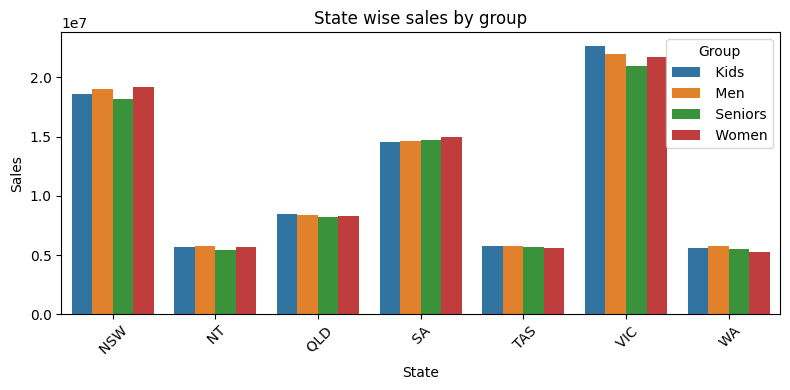

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(data=state_group_sales,x='State',y='Sales',hue='Group')
plt.title('State wise sales by group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Above visualization indicate that VIC state has biggest
 sales for all group.Out of this in VIC state,kids group provide highest sales.

Group-wise sales across states

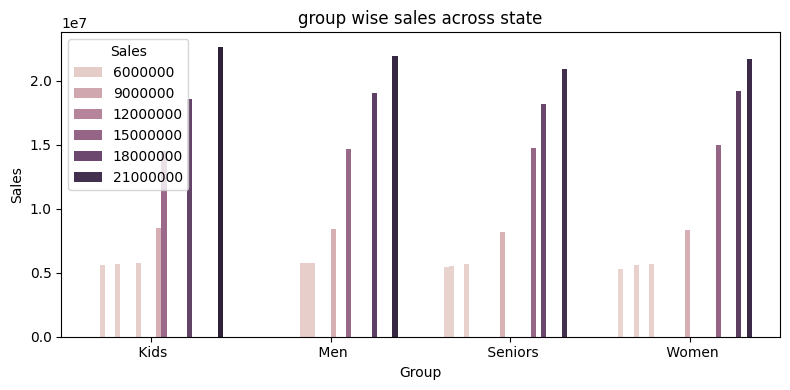

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(data=state_group_sales,x='Group',y='Sales',hue='Sales')
plt.title('group wise sales across state')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

from the above graph it depicts VIC having highest sales for all groups.

Tine of day Analysis

In [29]:
df['Time'].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [30]:
sales_by_time=df.groupby('Time')['Sales'].sum().reset_index()
sales_by_time

,Time,Sales
0,Afternoon,107175000
1,Evening,106125000
2,Morning,108667500


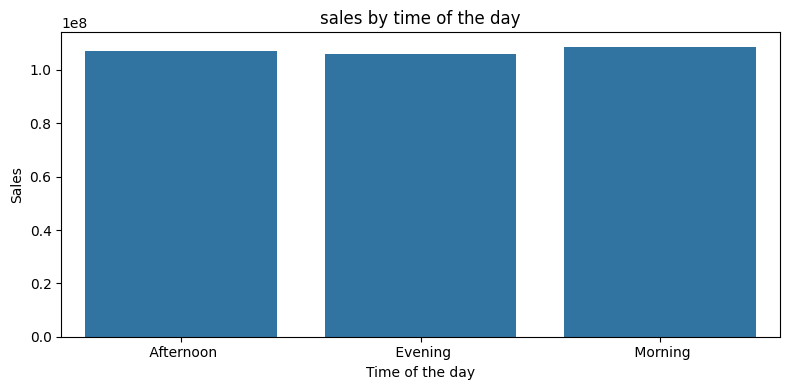

In [31]:
plt.figure(figsize=(8,4))
sns.barplot(data=sales_by_time,x='Time',y='Sales')
plt.title('sales by time of the day')
plt.xlabel('Time of the day')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

The graph shows,although there is not much difference,The afternoon is busiest and profitable time of the day.

In [32]:
units_by_time=df.groupby('Time')['Unit'].sum().reset_index()
units_by_time

,Time,Unit
0,Afternoon,42870
1,Evening,42450
2,Morning,43467


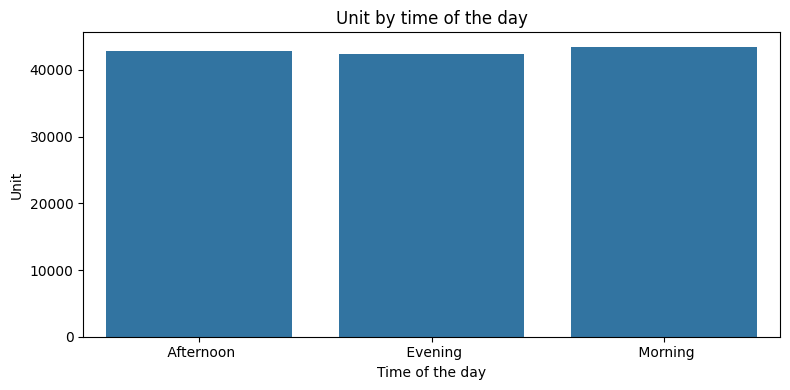

In [33]:
plt.figure(figsize=(8,4))
sns.barplot(data=units_by_time,x='Time',y='Unit')
plt.title('Unit by time of the day')
plt.xlabel('Time of the day')
plt.ylabel('Unit')
plt.tight_layout()
plt.show()

Morning has the highest units sold.

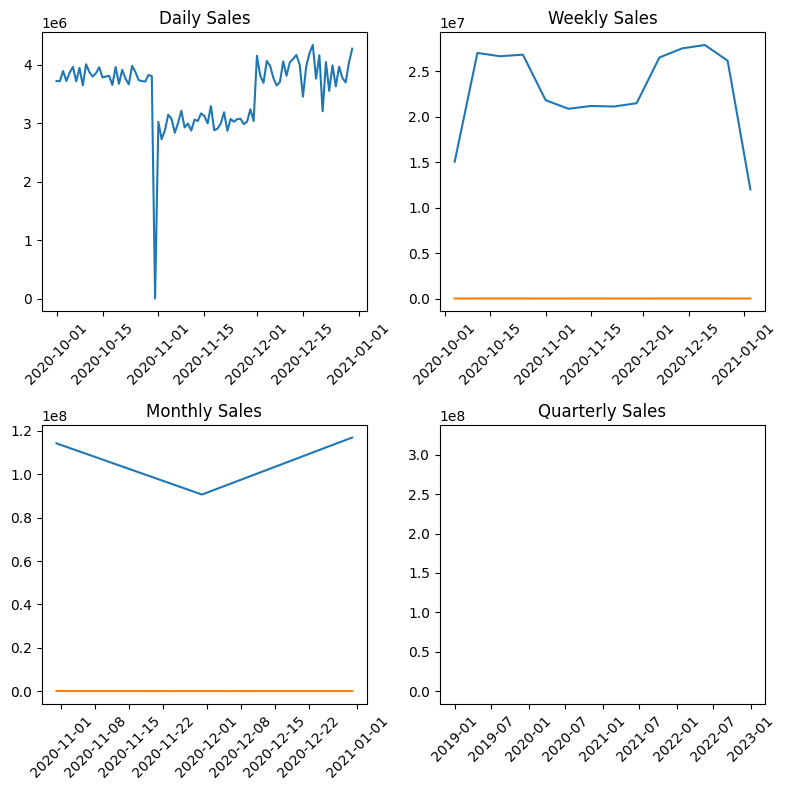

In [34]:

daily_sales=df['Sales'].resample('D').sum()
total_sales = [daily_sales, weekly_sales, monthly_sales, quarterly_sales]
titles = ['Daily Sales', 'Weekly Sales', 'Monthly Sales', 'Quarterly Sales']

plt.figure(figsize=(8, 8))

for i, data in enumerate(total_sales, 1):
    plt.subplot(2, 2, i)
    plt.plot(data.index, data.values)
    plt.title(titles[i-1])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()